In [99]:
import numpy as np
import pandas as pd

In [100]:
data = pd.read_csv("Unilever_cleaned.csv")

In [101]:
data

,Area Name,Lattitude,Longitude,Saturday - First Week,Saturday - Second Week,Saturday - Third Week,Saturday - Forth Week,Sunday - First Week,Sunday - Second Week,Sunday - Third Week,...,Wednesday - Third Week,Wednesday - Forth Week,Thursday - First Week,Thursday - Second Week,Thursday - Third Week,Thursday - Forth Week,Friday - First Week,Friday - Second Week,Friday - Third Week,Friday - Forth Week
0,A?n Benian,36.79,2.92,0,0,0,0,0,0,0,...,0,0,45,45,45,45,0,0,0,0
1,A?n Taya,36.79,3.30,0,0,0,0,0,0,0,...,0,0,27,27,27,27,0,0,0,0
2,Alger centre,36.77,3.06,0,0,0,0,0,0,0,...,0,0,51,51,51,51,0,0,0,0
3,Bab El-Oued,36.77,3.05,0,0,0,0,0,0,0,...,0,0,69,69,69,69,0,0,0,0
4,Bab Ezzouar,36.72,3.18,0,0,0,0,0,0,0,...,0,0,91,91,91,91,0,0,0,0
5,Baba Hcen,36.69,2.97,0,0,0,0,0,0,0,...,0,0,43,43,43,43,0,0,0,0
6,Bachdjerrah,36.72,3.12,0,0,0,0,0,0,0,...,0,0,30,30,30,30,0,0,0,0
7,Baraki,36.65,3.10,0,0,0,0,0,0,0,...,0,0,59,59,59,59,0,0,0,0
8,Belouizdad,36.76,3.06,0,0,0,0,0,0,0,...,0,0,40,40,40,40,0,0,0,0
9,Ben Aknoun,36.75,3.00,0,0,0,0,0,0,0,...,0,0,14,14,14,14,0,0,0,0


In [102]:
data1 = data.loc[:,[" Lattitude "," Longitude "," Thursday  - First Week"]]

In [103]:
data1[" Thursday  - First Week"].values

array([ 45,  27,  51,  69,  91,  43,  30,  59,  40,  14,  37,  27,  74,
        49,  33,  73, 123,  20,  69,  18,  86,  89,  39,  68,  31,  20,
        21,   6,  53,  27,  28,  12,  37,  77,  29,  15,  30,  26,  21,
       116, 101,  29,  44,  42,  17,   6,  32,   4,  14,  52,  33,  30,
        20,   2,  31,  17,  36,  14,  25], dtype=int64)

In [104]:
couple_array = []
for i,value in enumerate(data1[" Thursday  - First Week"].values):
    for j in range(value): 
        couple_array.append([data1[" Lattitude "][i],data1[" Longitude "][i]])

In [105]:
points = np.array(couple_array)

In [106]:
# Function to calculate the distance between two points
def distance(point1, point2):
    return np.linalg.norm(point1 - point2)

In [107]:
n = len(points)

Text(0, 0.5, 'Y')

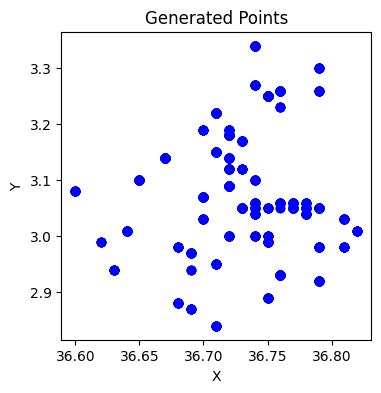

In [108]:
import matplotlib.pyplot as plt

# Generate n points in 2D space
p = 10 # Number of facilities to be opened <----------------------------
#points = generate_points(n) <-------------- GENERATE POINTS ----------------->
base = np.array([0,0])
n = len(points)


# Plot the generated points
plt.figure(figsize=(4, 4))
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Demand Points', marker='o')
plt.title('Generated Points')
plt.xlabel('X')
plt.ylabel('Y')

In [109]:
# Function to calculate the distance matrix
def calculate_distance_matrix(points):
    n = len(points)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = distance(points[i], points[j])
    return distance_matrix

In [110]:
# Calculate the distance matrix for the generated points
distance_matrix = calculate_distance_matrix(points)

In [111]:
import random

# Function to initialize the population
def initialize_population(population_size, n, p):
    population = []
    for _ in range(population_size):
        individual = [0] * n
        facility_indices = random.sample(range(n), p)
        for idx in facility_indices:
            individual[idx] = 1
        population.append(individual)
    return population

In [112]:
# Function to calculate the fitness of each individual
def evaluate_population(population, distance_matrix):
    fitness_scores = []
    for individual in population:
        total_distance = 0
        # Calculate the total distance for each demand point to its nearest facility
        for i in range(n):
            if individual[i] == 1: # Skip points that are facilities
                continue
            distances_to_facilities = [distance_matrix[i][j] for j in range(n) if individual[j] == 1]
            min_distance = min(distances_to_facilities)
            total_distance += min_distance
        # Fitness is the negative of the total distance
        fitness_scores.append(-total_distance)
    return fitness_scores

In [113]:
# Function to perform selection
def selection(population, fitness_scores, num_parents):
    # Select parents based on their fitness
    parents_indices = np.argsort(fitness_scores)[-num_parents:]
    parents = [population[idx] for idx in parents_indices]
    return parents

In [114]:
# Function to repair offspring to ensure exactly p facilities are selected
def repair(offspring):
    p = len(offspring)
    num_facilities = sum(offspring)
    if num_facilities >= 15:
        # Randomly deselect facilities until the count reaches p
        while num_facilities >= 15:
            idx = random.randrange(len(offspring))
            if offspring[idx] == 1:
                offspring[idx] = 0
                num_facilities -= 1
    elif num_facilities <=8:
        # Randomly select additional facilities until the count reaches p
        while num_facilities <= 8:
            idx = random.randrange(len(offspring))
            if offspring[idx] == 0:
                offspring[idx] = 1
                num_facilities += 1
    return offspring

In [115]:
# Function to perform crossover with repair operation
def crossover_with_repair(parents, offspring_size):
    offspring = []
    while len(offspring) <= offspring_size:
        parent1 = random.choice(parents)
        parent2 = random.choice(parents)
        crossover_point = random.randint(1, len(parent1) - 1)
        offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
        offspring2 = parent2[:crossover_point] + parent1[crossover_point:]
        
        # Perform repair operation to ensure exactly p facilities are selected
        offspring1 = repair(offspring1)
        offspring2 = repair(offspring2)
        
        offspring.append(offspring1)
        offspring.append(offspring2)
        
    return offspring

In [116]:
# Function to perform mutation
def mutation(offspring, mutation_rate):
    for i in range(len(offspring)):
        for j in range(len(offspring[i])):
            if random.random() < mutation_rate:
                offspring[i][j] = 1 - offspring[i][j]  # Flip the bit with probability mutation_rate

        repair(offspring[i])

    return offspring

In [117]:
def replacement(population, children, num):
    # Combine the current population and children
    combined_population = population + children

    children = [list(row) for row in set(tuple(row) for row in combined_population)] # Remove duplicates
    
    # Calculate fitness for each individual in the combined population
    fitness_scores = evaluate_population(children, distance_matrix)
    
    # Combine individuals with their fitness scores
    combined_population_with_fitness = list(zip(children, fitness_scores))
    
    # Sort the combined population based on fitness (descending order) "m kbir l sghir"
    combined_population_with_fitness.sort(key=lambda x: x[1], reverse=True)
    
    # Select the top individuals (parents) to form the new population
    new_population = [individual for individual, _ in combined_population_with_fitness[:num]]
    
    return new_population

In [127]:
# Initialize population
population_size = 150 # Number of population size <---------------------------
num_generations = 4 # Number of generations to simulate <----------------------------
num_parents = int(0.1*population_size)  # Number of parents to select from the best <------------------
offspring_size = int(0.5*population_size) # Offspring size for crossover <----------------------
mutation_rate = 0.05 # Probability of mutation <--------------------------------


population = initialize_population(population_size, n, p)

In [128]:
# Main genetic algorithm loop
best_solution = None
best_score = -100000

for generation in range(num_generations):
    
    mutation_rate = 0.05-0.05*generation/num_generations

    # Evaluate the initial population
    fitness_scores = evaluate_population(population, distance_matrix)

    # Perform selection
    parents = selection(population, fitness_scores, num_parents)

    # Perform crossover
    offspring = crossover_with_repair(parents, offspring_size)

    # Perform mutation 
    mut = mutation(population, mutation_rate)

    new_generated_children = offspring + mut


    # Perform replacement
    new_population = replacement(population, new_generated_children, population_size)
    population = new_population

    # Evaluate fitness of the new population
    new_fitness_scores = evaluate_population(population, distance_matrix)



    best_individual = max(population, key=lambda x: new_fitness_scores[population.index(x)])
    best_individual_fitness = new_fitness_scores[population.index(best_individual)]
    print(f"Fitness of Best Individual in Generation {generation + 1}: {best_individual_fitness}")





   # Update best solution
    best_individual = max(population, key=lambda x: new_fitness_scores[population.index(x)])
    if best_solution is None or new_fitness_scores[population.index(best_individual)] > best_score:
        best_solution = best_individual
        best_score = new_fitness_scores[population.index(best_individual)]

    # Print progress
    print(f"Generation {generation + 1}: Best Fitness = {best_score}")

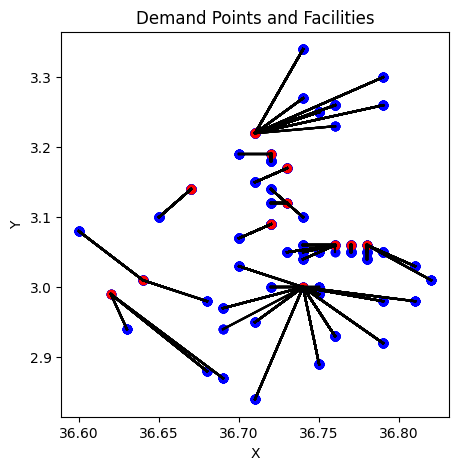

In [125]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(5, 5))

# Extract coordinates of demand and facility points
demand_points = [point for point, is_facility in zip(points, best_solution) if not is_facility]
facility_points = [point for point, is_facility in zip(points, best_solution) if is_facility]

# Plot demand points in blue
for point in demand_points:
    plt.scatter(point[0], point[1], color='blue', marker='o')

# Plot facility points in red
for point in facility_points:
    plt.scatter(point[0], point[1], color='red', marker='o')


# Connect each demand point to its closest facility
for demand_point in demand_points:
    min_distance = 100000
    closest_facility = None
    for facility_point in facility_points:
        distance = np.linalg.norm(demand_point - facility_point)
        if distance < min_distance:
            min_distance = distance
            closest_facility = facility_point
    plt.plot([demand_point[0], closest_facility[0]], [demand_point[1], closest_facility[1]], color='black')

# Set plot title and labels
plt.title('Demand Points and Facilities')
plt.xlabel('X')
plt.ylabel('Y')

# Display plot
plt.show()